### Importaci√≥n de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Total de precio
ingreso_por_tienda = tienda.groupby('Lugar de Compra')['Precio'].sum().reset_index()


In [9]:
print(ingreso_por_tienda)

   Lugar de Compra       Precio
0          Armenia    4615700.0
1     Barranquilla   32907700.0
2           Bogot√°  440005000.0
3      Bucaramanga   17579200.0
4             Cali  154493700.0
5        Cartagena   22296700.0
6           C√∫cuta   37879500.0
7          In√≠rida    2722500.0
8          Leticia   14669800.0
9        Manizales    8027600.0
10        Medell√≠n  296858100.0
11           Neiva    3494000.0
12           Pasto   14996400.0
13         Pereira   56214300.0
14        Riohacha   18512700.0
15     Santa Marta   13198300.0
16          Soacha    4126000.0
17      Valledupar    1121300.0
18   Villavicencio    7161900.0


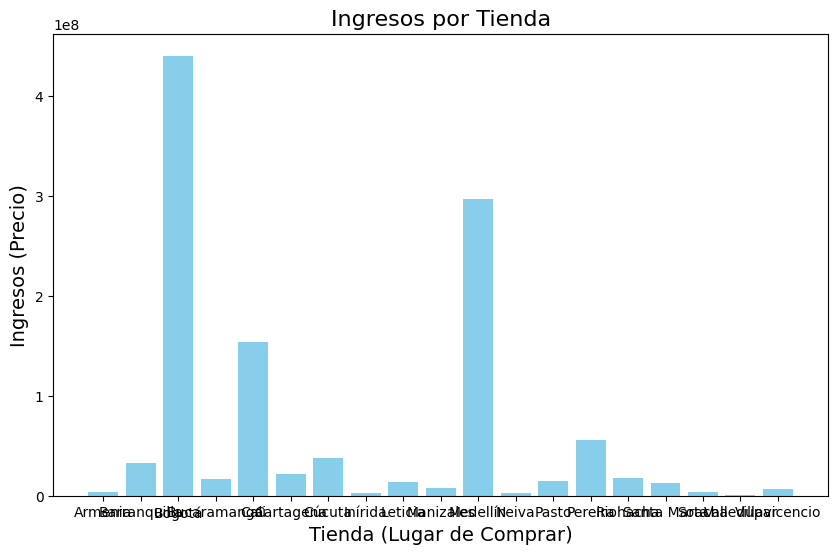

In [26]:
# Crear graficos
plt.figure(figsize=(10, 6))
plt.bar(ingreso_por_tienda['Lugar de Compra'], ingreso_por_tienda['Precio'], color='skyblue')

# Titulos
plt.title('Ingresos por Tienda', fontsize=16)
plt.xlabel('Tienda (Lugar de Comprar)', fontsize=14)
plt.ylabel('Ingresos (Precio)', fontsize=14)

# Mostrar
plt.show()

# 2. Ventas por categor√≠a

In [11]:
# Cantidad de Productos vendidos
producto = tienda.groupby('Categor√≠a del Producto')['Producto'].count().reset_index()

In [12]:
print(producto)

    Categor√≠a del Producto  Producto
0  Art√≠culos para el hogar       171
1     Deportes y diversi√≥n       284
2        Electrodom√©sticos       312
3             Electr√≥nicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465


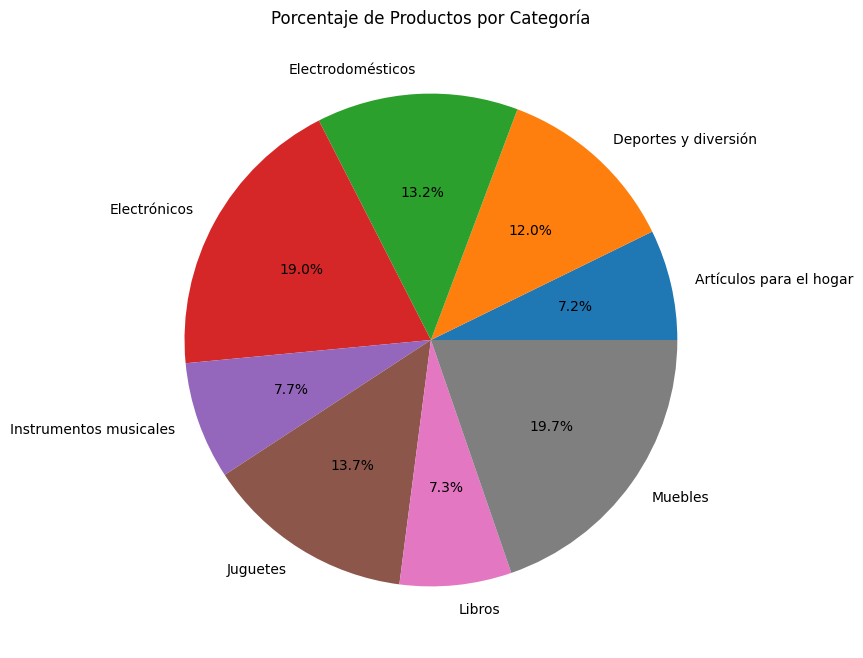

In [27]:
plt.figure(figsize=(8,8))
plt.pie(producto['Producto'], labels=producto['Categor√≠a del Producto'], autopct='%1.1f%%')
plt.title('Porcentaje de Productos por Categor√≠a')
plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [14]:
# Clasificacion de satisfaccion de clientes
satisfaccion = tienda.groupby('Lugar de Compra')['Calificaci√≥n'].mean().reset_index()

In [15]:
print(satisfaccion)

   Lugar de Compra  Calificaci√≥n
0          Armenia      3.357143
1     Barranquilla      3.573333
2           Bogot√°      4.089431
3      Bucaramanga      4.387097
4             Cali      3.985866
5        Cartagena      4.037736
6           C√∫cuta      3.882353
7          In√≠rida      4.000000
8          Leticia      4.156250
9        Manizales      3.800000
10        Medell√≠n      3.866785
11           Neiva      4.500000
12           Pasto      4.043478
13         Pereira      3.947368
14        Riohacha      3.450000
15     Santa Marta      3.750000
16          Soacha      4.600000
17      Valledupar      2.666667
18   Villavicencio      4.090909


# 4. Productos m√°s y menos vendidos

In [17]:
ventas = tienda.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Productos mas vendidos
productos_mas_vendidos = ventas.sort_values('Cantidad Vendida', ascending=False).groupby('Lugar de Compra').first().reset_index()

# Productos menos vendidos
productos_menos_vendidos = ventas.sort_values('Cantidad Vendida', ascending=True).groupby('Lugar de Compra').first().reset_index()

In [18]:
print(productos_mas_vendidos)

   Lugar de Compra             Producto  Cantidad Vendida
0          Armenia     Silla de oficina                 2
1     Barranquilla           Cuberter√≠a                 4
2           Bogot√°         Vaso t√©rmico                30
3      Bucaramanga  Bal√≥n de baloncesto                 3
4             Cali          Tablet ABXY                10
5        Cartagena     Silla de oficina                 4
6           C√∫cuta            Iphone 15                 4
7          In√≠rida       Mesa de centro                 1
8          Leticia               Estufa                 4
9        Manizales             Smart TV                 2
10        Medell√≠n          Auriculares                19
11           Neiva         Refrigerador                 1
12           Pasto     Lavadora de ropa                 3
13         Pereira              Armario                 7
14        Riohacha   Guitarra el√©ctrica                 3
15     Santa Marta       Mesa de centro                 2
16    

In [19]:
print(productos_menos_vendidos)

   Lugar de Compra                   Producto  Cantidad Vendida
0          Armenia    Bloques de construcci√≥n                 1
1     Barranquilla                Auriculares                 1
2           Bogot√°  Auriculares con micr√≥fono                 8
3      Bucaramanga            Cubo m√°gico 8x8                 1
4             Cali            Olla de presi√≥n                 1
5        Cartagena                Tablet ABXY                 1
6           C√∫cuta                Tablet ABXY                 1
7          In√≠rida             Mesa de centro                 1
8          Leticia              Juego de mesa                 1
9        Manizales              Kit de bancas                 1
10        Medell√≠n                 Cuberter√≠a                 4
11           Neiva               Refrigerador                 1
12           Pasto               Refrigerador                 1
13         Pereira                 Smartwatch                 1
14        Riohacha             

# 5. Env√≠o promedio por tienda

In [22]:
envio_promedio = tienda.groupby('Lugar de Compra')['Costo de env√≠o'].mean().reset_index()

In [23]:
print(envio_promedio)

   Lugar de Compra  Costo de env√≠o
0          Armenia    17314.285714
1     Barranquilla    23708.000000
2           Bogot√°    23815.853659
3      Bucaramanga    30587.096774
4             Cali    28827.561837
5        Cartagena    22624.528302
6           C√∫cuta    40129.411765
7          In√≠rida    28460.000000
8          Leticia    24450.000000
9        Manizales    29140.000000
10        Medell√≠n    28207.104796
11           Neiva    31516.666667
12           Pasto    35078.260870
13         Pereira    22403.759398
14        Riohacha    24357.500000
15     Santa Marta    22593.750000
16          Soacha    43420.000000
17      Valledupar    18766.666667
18   Villavicencio    34709.090909


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

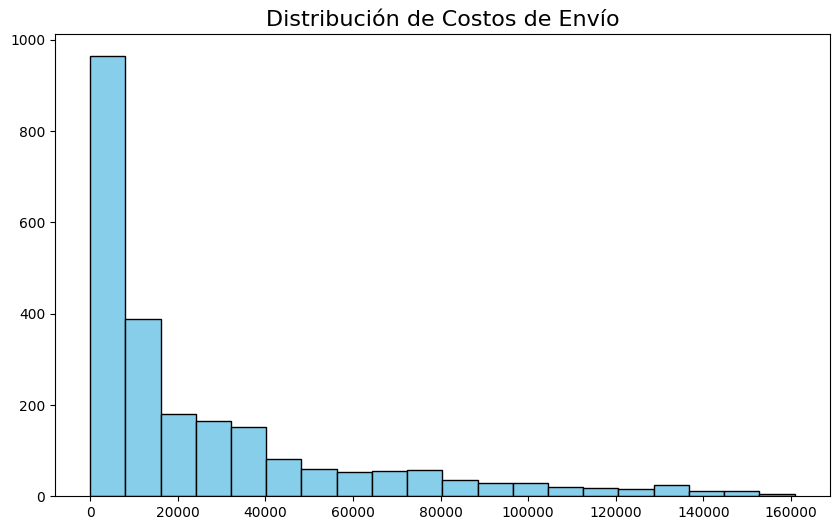

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(tienda['Costo de env√≠o'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n de Costos de Env√≠o', fontsize=16)
plt

# üìÑ Informe de An√°lisis por Tienda

## Introducci√≥n

El prop√≥sito de este an√°lisis es determinar cu√°l tienda es la mejor opci√≥n para que el Sr. Juan venda sus productos. Para ello, se analizaron diversos factores relevantes: los ingresos totales de cada tienda, las categor√≠as de productos m√°s y menos vendidas, las calificaciones promedio de los clientes, los productos con mayor y menor volumen de ventas, y el coste promedio de env√≠o.

---

## 1. Ingresos Totales por Tienda

Del an√°lisis realizado, se identific√≥ que la tienda de **Bolivia** obtuvo los **mayores ingresos totales**, consolid√°ndose como la tienda con mejor desempe√±o econ√≥mico. Por otro lado, la tienda de **Valledupar** present√≥ el nivel de ingresos m√°s bajo.

---

## 2. Categor√≠as de Productos M√°s y Menos Vendidos

La **categor√≠a de muebles** result√≥ ser la m√°s vendida en todas las tiendas, mientras que la categor√≠a de **art√≠culos para el hogar** tuvo el menor volumen de ventas.

---

## 3. Calificaciones Promedio de los Clientes por Tienda

Las tiendas ubicadas en **Bucaramanga**, **Soacha** y **Villavicencio** destacaron con las **calificaciones promedio m√°s altas** otorgadas por los clientes, lo cual refleja una buena experiencia de compra en estos establecimientos.

---

## 4. Productos M√°s y Menos Vendidos

Entre los **productos m√°s vendidos** se encuentran:

- Vaso t√©rmico
- Auriculares
- Tablet AXBT

Mientras que los **productos menos vendidos** fueron:

- Smart TV
- Bloques de construcci√≥n
- Cubo m√°gico 8x8

---

## 5. Coste de Env√≠o Promedio por Tienda

Respecto al costo de env√≠o:

- **Soacha** present√≥ el **costo de env√≠o m√°s alto**, representando aproximadamente un **8.2%** del valor de los productos.
- **Armenia** tuvo el **costo de env√≠o m√°s bajo**, con un promedio de **3.3%**.

---

## Conclusi√≥n

Tras analizar todos los factores evaluados, se recomienda que el Sr. Juan **venda sus productos en la tienda de Bolivia**.  
Esta tienda presenta los **mayores ingresos totales**, lo que indica un alto volumen de ventas, factor crucial para maximizar las oportunidades comerciales.  
Aunque otras tiendas como Bucaramanga y Soacha tienen mejores calificaciones promedio, el volumen econ√≥mico de Bolivia, junto con su capacidad de ventas en categor√≠as como muebles, hacen de esta tienda la opci√≥n m√°s estrat√©gica.  
Adicionalmente, se debe considerar que el costo de env√≠o no es el m√°s bajo, pero se compensa ampliamente con el potencial de ventas.

En resumen, **la tienda de Bolivia representa la mejor combinaci√≥n entre alto desempe√±o econ√≥mico y oportunidad de crecimiento comercial** para el Sr. Juan.



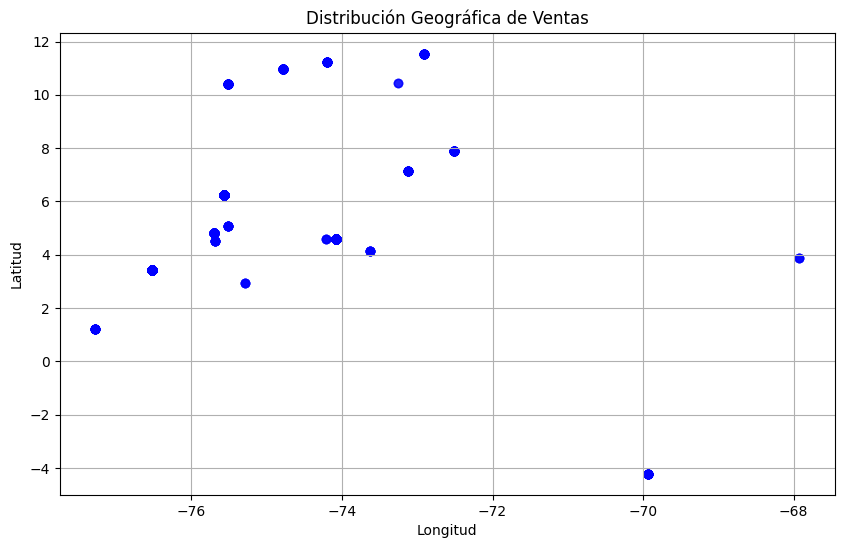

In [33]:
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama 'ventas' y tiene columnas 'lat' y 'lon'
plt.figure(figsize=(10, 6))
plt.scatter(tienda['lon'], tienda['lat'], alpha=0.5, c='blue')

plt.title('Distribuci√≥n Geogr√°fica de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


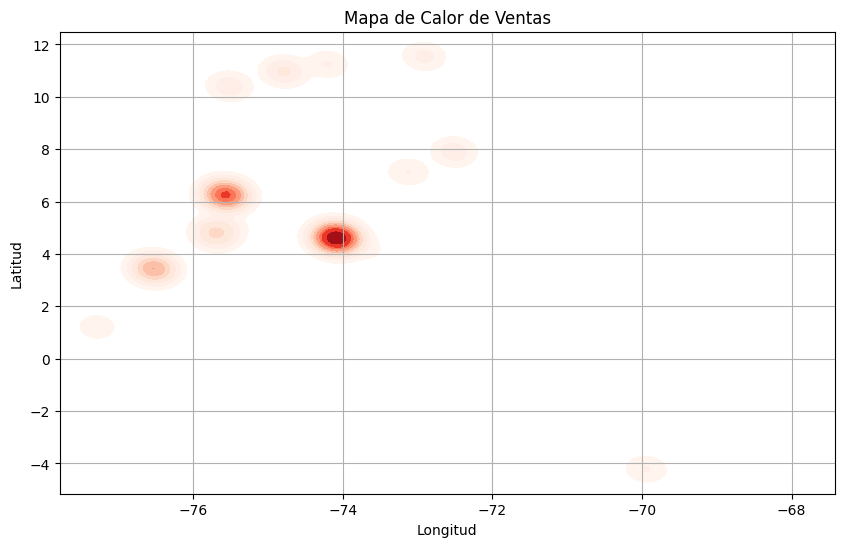

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=tienda['lon'],
    y=tienda['lat'],
    cmap='Reds',
    fill=True,
    bw_adjust=0.5
)
plt.title('Mapa de Calor de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


El siguente mapa es de mi parte extra un mapa con foliu, para obtener un mapa interactivo

In [36]:
!pip install folium


In [39]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[tienda['lat'].mean(), tienda['lon'].mean()], zoom_start=5)

heat_data = [[row['lat'], row['lon']] for index, row in tienda.iterrows()]
HeatMap(heat_data).add_to(mapa)

mapa
